In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

full_data_path = '/workspaces/Health-Indicators/notebooks/diabetes_012_health_indicators_BRFSS2015.csv'
df_full = pd.read_csv(full_data_path)

/tmp/ipykernel_2051/1353383494.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
missing_values_full = df_full.isnull().sum()
print(missing_values_full)

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [4]:
X = df_full.drop('Diabetes_012', axis=1)
y = df_full['Diabetes_012']
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [8]:
from sklearn.metrics import roc_auc_score

y_pred_rf_proba = rf.predict_proba(X_test_scaled)


In [9]:
y_pred_rf_proba = rf.predict_proba(X_test_scaled)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba, multi_class='ovr', average='weighted')
print(f'RandomForest ROC AUC: {roc_auc_rf}')


RandomForest ROC AUC: 0.9832095942650049


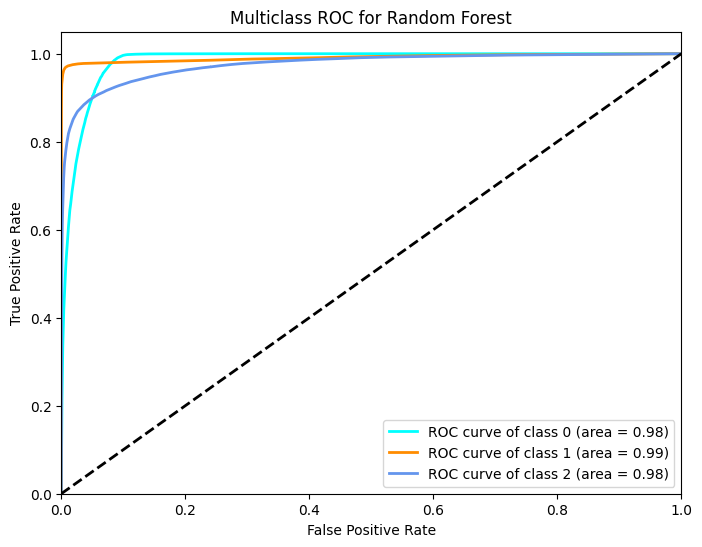

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np

# Assuming your RandomForest model is named 'rf' and is already trained
# Replace 'X_test_scaled' with your test set features and 'y_test' with your true class labels

# Binarize the output for multiclass ROC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # adjust classes accordingly
n_classes = y_test_binarized.shape[1]

# Predict probabilities for the test set
y_pred_rf_proba = rf.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_rf_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  # adjust or extend colors for more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC for Random Forest')
plt.legend(loc="lower right")
plt.show()


In [11]:
# Import XGBoost and train the model
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [12]:
# Predict probabilities for the test set
y_pred_xgb_proba = xgb.predict_proba(X_test_scaled)


In [13]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier

# Binarize the labels for multi-class problem
classes = y_test.unique()
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Update the classes with your actual classes

# Calculate the predicted probabilities for each class
y_pred_xgb_proba = xgb.predict_proba(X_test_scaled)

# Calculate the ROC AUC score using the predicted probabilities
# For multi-class, you need to calculate the metrics for each class and take the average
roc_auc_xgb = roc_auc_score(y_test_binarized, y_pred_xgb_proba, multi_class='ovr', average='weighted')
print(f'XGBoost ROC AUC: {roc_auc_xgb}')


XGBoost ROC AUC: 0.9438301377471376


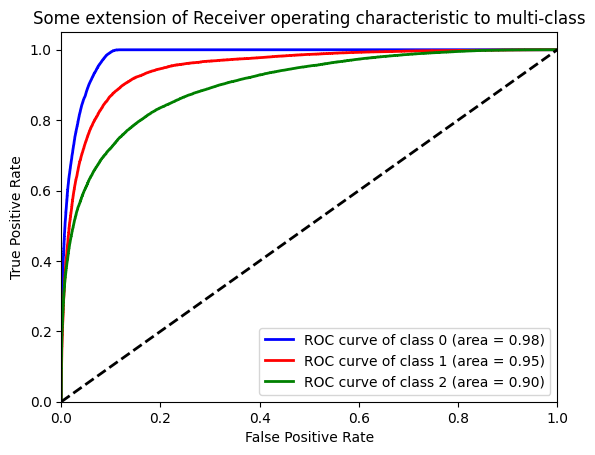

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming y_pred_xgb_proba is the predicted probability for each class from XGBoost
# And y_test is your true class labels

# Binarize the output for multiclass ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_xgb_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

# Plot all ROC curves
plt.figure()

colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()




In [15]:
from joblib import dump

dump(rf, "random_forest_diabetes_model.joblib")
dump(xgb, "xgboost_diabetes_model.joblib")


['xgboost_diabetes_model.joblib']

In [16]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [17]:
df = pd.read_csv('/workspaces/Health-Indicators/notebooks/diabetes_012_health_indicators_BRFSS2015.csv')
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
log_reg = LogisticRegression(penalty='l1', solver='saga', random_state=42)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(penalty='l1', random_state=42, solver='saga')

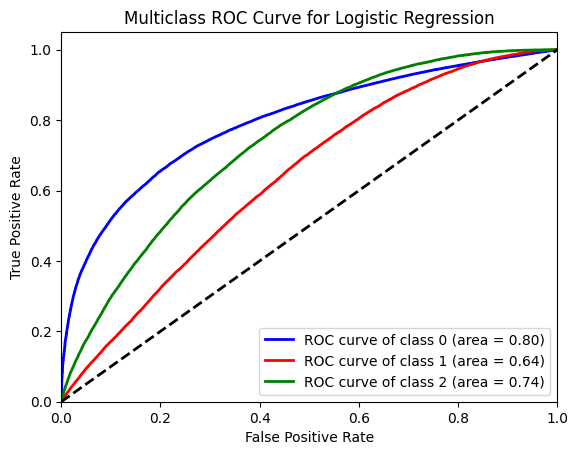

In [19]:
y_pred_log_reg_proba = log_reg.predict_proba(X_test_scaled)

# Binarize the output
n_classes = y_pred_log_reg_proba.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_log_reg_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_pred_log_reg_proba[:, i])

# Plotting ROC curve for each class
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


In [20]:
# Predict probabilities for Logistic Regression
y_pred_log_reg_proba = log_reg.predict_proba(X_test_scaled)

# Compute ROC AUC score
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg_proba, multi_class='ovr', average='weighted')
print(f'Logistic Regression ROC AUC: {roc_auc_log_reg}')


Logistic Regression ROC AUC: 0.7236047007648612


In [21]:
from joblib import dump

# Regression model is stored in log_reg
dump(log_reg, 'logistic_regression_model.joblib')




['logistic_regression_model.joblib']